In [2]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist, lookup_tools
from fnal_column_analysis_tools.hist import plot


In [5]:
array = np.random.randint(0, 10, size=(7, 5))
print(array)
_ = array2hist(array,hist)

[[0 3 5 4 3]
 [8 2 4 2 4]
 [6 1 8 4 9]
 [4 6 7 1 0]
 [0 9 5 8 6]
 [1 1 9 5 5]
 [3 4 8 0 2]]


NameError: name 'array2hist' is not defined

In [3]:
with gzip.open("hists_reoptimization_finern2.pkl.gz") as fin:
    hists = pickle.load(fin)

In [4]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset")
#process_cats = ("dataset", "AK8Puppijet0_isHadronicV")

process_map = OrderedDict()
#process_map["QCD"] = ("QCD*", slice(None))
#process_map["QCDinV"] = ("Z*", 0)
#process_map["Hcc"] = ("GluGluHToCC", 2)
#process_map["Hbb"] = ("GluGluHToBB", 3)
#process_map["Zqq"] = ("ZJetsToQQ_HT*", 1)
#process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
#process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
#process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
#process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
#process_map["Top"] = ("TTTo*", slice(None))
#process_map["QCD"] = ("QCD*", slice(None))
process_map["QCD"] = ("QCD*")



for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats,process_map)

/home/sangeon/.local/lib/python3.5/site-packages/fnal_column_analysis_tools/hist/hist_tools.py:478: RuntimeWarning: Allocating a large (>10M bin) histogram!
  warnings.warn("Allocating a large (>10M bin) histogram!", RuntimeWarning)


In [6]:
x = hists['hjetpt']


In [5]:
print(x)

<Hist (process,AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7f9c54905a58>


In [6]:
y = x.project("AK8Puppijet0_pt", slice(450,None), overflow='over')


In [40]:
print(y)


<Hist (process,jetrho,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7f6506163588>


In [41]:
z = y.sum("jetrho")


In [42]:
print(z)


<Hist (process,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7f65061633c8>


In [43]:
print(z.sum("AK8Puppijet0_N2sdb1").values())


{('QCD',): array([3.42285125e+05, 1.69988594e+05, 8.37685938e+04, 5.08990898e+04,
       3.48425664e+04, 2.54587227e+04, 1.97374863e+04, 1.58891045e+04,
       1.31202588e+04, 1.10953857e+04, 9.51097363e+03, 8.38827051e+03,
       7.48114697e+03, 6.69003174e+03, 6.05607031e+03, 5.52254297e+03,
       5.10571973e+03, 4.81279248e+03, 4.47870459e+03, 4.26581006e+03,
       4.07682275e+03, 3.88143628e+03, 3.80036621e+03, 3.64555225e+03,
       3.63078784e+03, 3.61309204e+03, 3.55200879e+03, 3.58168408e+03,
       3.59296362e+03, 3.69875024e+03, 3.72755640e+03, 3.89982886e+03,
       4.07926514e+03, 4.27164648e+03, 4.39701172e+03, 4.06022388e+03,
       2.98255713e+03, 1.56905103e+03, 5.15397156e+02, 7.06903687e+01],
      dtype=float32)}


In [44]:
def multidim_cumsum(a):
    out = a[...,::-1].cumsum(1)[...,::-1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

In [45]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [46]:
print(a)

[[ 7 -1  3]
 [ 1 -2  4]
 [10  1  5]]


In [47]:
multidim_cumsum(a)

array([[ 9,  2,  3],
       [12,  4,  7],
       [28, 10, 12]])

In [48]:
k = z.sum("AK8Puppijet0_N2sdb1").values()

In [94]:
cumsum_directions = [-1, 1] 
ordering = tuple(slice(None,None,d) for d in cumsum_directions)
print(ordering)

(slice(None, None, -1), slice(None, None, 1))


In [50]:
k[('QCD',)]

array([3.42285125e+05, 1.69988594e+05, 8.37685938e+04, 5.08990898e+04,
       3.48425664e+04, 2.54587227e+04, 1.97374863e+04, 1.58891045e+04,
       1.31202588e+04, 1.10953857e+04, 9.51097363e+03, 8.38827051e+03,
       7.48114697e+03, 6.69003174e+03, 6.05607031e+03, 5.52254297e+03,
       5.10571973e+03, 4.81279248e+03, 4.47870459e+03, 4.26581006e+03,
       4.07682275e+03, 3.88143628e+03, 3.80036621e+03, 3.64555225e+03,
       3.63078784e+03, 3.61309204e+03, 3.55200879e+03, 3.58168408e+03,
       3.59296362e+03, 3.69875024e+03, 3.72755640e+03, 3.89982886e+03,
       4.07926514e+03, 4.27164648e+03, 4.39701172e+03, 4.06022388e+03,
       2.98255713e+03, 1.56905103e+03, 5.15397156e+02, 7.06903687e+01],
      dtype=float32)

In [51]:
multidim_cumsum(k[('QCD',)])

AxisError: axis 1 is out of bounds for array of dimension 1

In [35]:
t = z.values(overflow='allnan')


In [ ]:
print(t)

In [ ]:
multidim_cumsum(t[()])

In [52]:
background = multidim_cumsum(t[('QCD',)])

In [26]:
print(background)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.7349408e-01 5.7349408e-01 5.7349408e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.5772139e+00 1.5772139e+00 1.5772139e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [8.9606531e+05 8.9606531e+05 5.5378031e+05 ... 9.2514366e+01
  2.1824032e+01 2.1824032e+01]
 [8.9606531e+05 8.9606531e+05 5.5378031e+05 ... 9.2514366e+01
  2.1824032e+01 2.1824032e+01]
 [8.9606531e+05 8.9606531e+05 5.5378031e+05 ... 9.2514366e+01
  2.1824032e+01 2.1824032e+01]]


In [53]:
signal = multidim_cumsum(t[('Hbb',)])

KeyError: ('Hbb',)

In [ ]:
print(signal)

In [ ]:
print(a)

In [72]:
aa = multidim_cumsum(a)

In [ ]:
print(aa)

In [ ]:
print(np.sqrt(aa))

In [28]:
sqrtbkg = np.sqrt(background)

In [ ]:
print(sqrtbkg)

In [ ]:
print(aa)

In [ ]:
print(aa+1)

In [ ]:
print((aa+1)/aa)

In [29]:
soverb = signal/(sqrtbkg+1)

In [ ]:
print(soverb)

In [ ]:
print(np.amax(aa))

In [ ]:
print(np.amax(soverb))

In [ ]:
print(np.argmax(aa))

In [ ]:
print(aa.8)

In [73]:
print(aa/8)

[[1.125 0.25  0.375]
 [1.5   0.5   0.875]
 [3.5   1.25  1.5  ]]


In [ ]:
print(aa/np.amax(aa))

In [ ]:
print(aa/np.argmax(aa))

In [ ]:
print(soverb/np.amax(soverb))

In [30]:
norm_soverb = soverb/np.amax(soverb)

In [32]:
print(norm_soverb)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.2901693e-04 1.2901693e-04 1.2955607e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]]


In [ ]:
print(np.argmax(soverb))

In [ ]:
plt.imshow(signal, cmap='hot', interpolation='nearest')

In [31]:
print(np.amax(norm_soverb))

1.0


In [ ]:
ptbins = np.searchsorted(norm_soverb[:,3], 1.0)

In [ ]:
print(np.unravel_index(norm_soverb.argmax(), norm_soverb.shape))

In [ ]:
plt.imshow(sqrtbkg, cmap='hot', interpolation='nearest')

In [26]:
htemp = z.project("process")

In [27]:
htemp.clear()

In [28]:
htemp.label = '$S/\sqrt{B}$'

In [29]:
htemp._sumw = {():t[('QCD',)]}

<IPython.core.display.Javascript object>


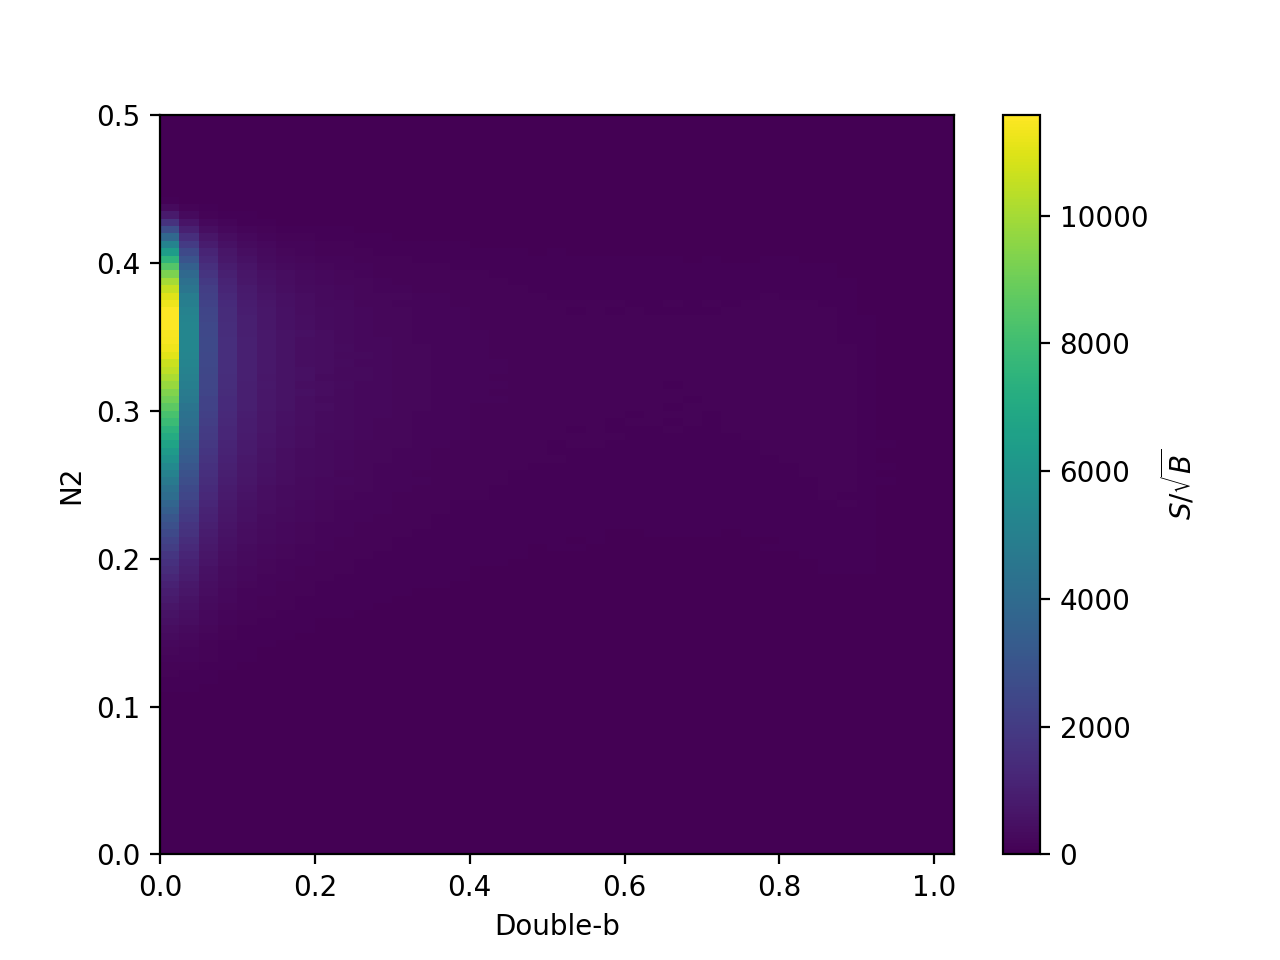

In [30]:
fig, ax, _ = plot.plot2d(htemp, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [94]:
fig.savefig("plots/HBB_N2_ddb.pdf")


In [29]:
print(x)

<Hist (process,AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7f51f9397588>


In [ ]:
print(x_Hbb)

In [7]:
histo = x.sum("AK8Puppijet0_deepdoubleb")
print(histo)
print(histo._axes)

<Hist (process,AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7fc879d70668>
(<Cat (name=process) instance at 0x7fc8ac177d30>, <Bin (name=AK8Puppijet0_pt) instance at 0x7fc8b2a72ef0>, <Bin (name=jetrho) instance at 0x7fc879d63780>, <Bin (name=AK8Puppijet0_N2sdb1) instance at 0x7fc879d67438>)


<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7f6508444b38>


<IPython.core.display.Javascript object>


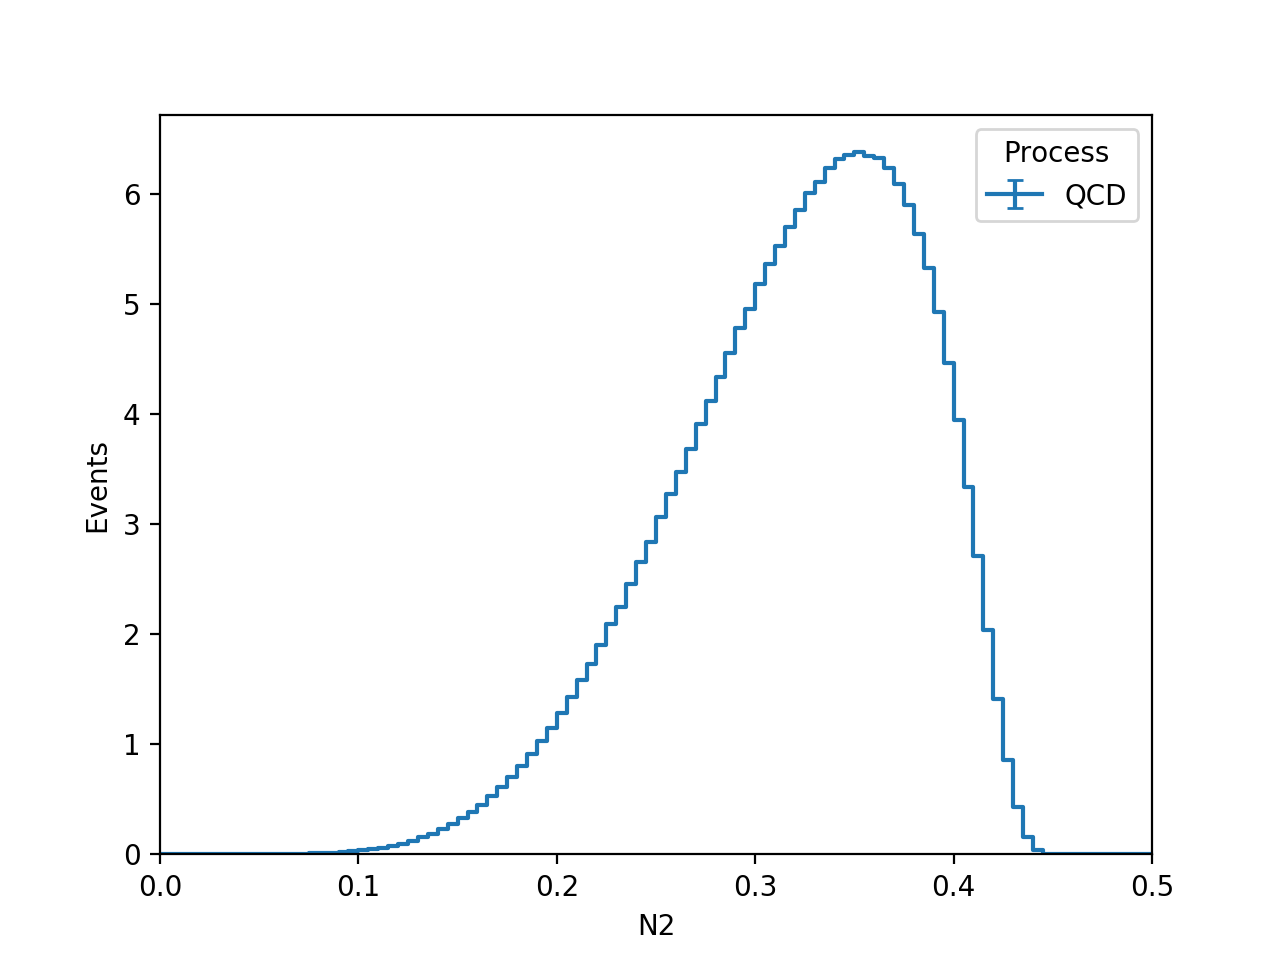

In [16]:
print(histo.sum("process"))
fig, ax, _ = plot.plot1d(histo.sum("AK8Puppijet0_pt").sum("jetrho"),
            overlay="process", error_opts={}, density=True
           )
fig.savefig("plots/QCD_N2_dist.pdf")



In [8]:
val_QCD = histo.values(overflow='allnan')[('QCD',)]
#val_HBB = histo.values(overflow='allnan')[('Hbb',)]
print(val_QCD)
#print(val_HBB)

[[[0.0000000e+00 8.1339875e+05 3.9549133e+03 ... 0.0000000e+00
   0.0000000e+00 1.9967853e+05]
  [0.0000000e+00 6.2162666e+00 1.7862298e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 4.4367762e+00 5.7146174e-01 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 8.2902241e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 8.8629609e+04]]

 [[0.0000000e+00 1.4573583e+04 8.1030457e+01 ... 0.0000000e+00
   0.0000000e+00 3.7857710e+03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.000

In [9]:
np.cumsum(val_QCD, axis=2)

array([[[0.00000000e+00, 8.13398750e+05, 8.17353688e+05, ...,
         1.43737450e+07, 1.43737450e+07, 1.45734240e+07],
        [0.00000000e+00, 6.21626663e+00, 8.00249672e+00, ...,
         1.99104750e+05, 1.99104750e+05, 1.99104750e+05],
        [0.00000000e+00, 4.43677616e+00, 5.00823784e+00, ...,
         1.99758156e+05, 1.99758156e+05, 1.99758156e+05],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.11592469e+05, 3.11592469e+05, 3.11592469e+05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.42756288e+06, 1.42756288e+06, 1.42756288e+06],
        [0.00000000e+00, 8.29022408e+00, 8.29022408e+00, ...,
         8.29022408e+00, 8.29022408e+00, 8.86378984e+04]],

       [[0.00000000e+00, 1.45735830e+04, 1.46546133e+04, ...,
         2.13752219e+05, 2.13752219e+05, 2.17537984e+05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.24353784e+03, 2.24353784e+03, 2.24353784e+03],
        [0.00000000e+00, 

In [10]:
print(a)

NameError: name 'a' is not defined

In [11]:
numpy.cumsum(a)

NameError: name 'numpy' is not defined

In [12]:
np.cumsum(val_QCD, axis=2)

array([[[0.00000000e+00, 8.13398750e+05, 8.17353688e+05, ...,
         1.43737450e+07, 1.43737450e+07, 1.45734240e+07],
        [0.00000000e+00, 6.21626663e+00, 8.00249672e+00, ...,
         1.99104750e+05, 1.99104750e+05, 1.99104750e+05],
        [0.00000000e+00, 4.43677616e+00, 5.00823784e+00, ...,
         1.99758156e+05, 1.99758156e+05, 1.99758156e+05],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.11592469e+05, 3.11592469e+05, 3.11592469e+05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.42756288e+06, 1.42756288e+06, 1.42756288e+06],
        [0.00000000e+00, 8.29022408e+00, 8.29022408e+00, ...,
         8.29022408e+00, 8.29022408e+00, 8.86378984e+04]],

       [[0.00000000e+00, 1.45735830e+04, 1.46546133e+04, ...,
         2.13752219e+05, 2.13752219e+05, 2.17537984e+05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.24353784e+03, 2.24353784e+03, 2.24353784e+03],
        [0.00000000e+00, 

In [13]:
qcd_maxval_temp = np.cumsum(val_QCD, axis=2)
#hbb_maxval_temp = np.cumsum(val_HBB, axis=2)

In [14]:
print(hbb_maxval_temp)

NameError: name 'hbb_maxval_temp' is not defined

In [15]:
qcd_maxval = qcd_maxval_temp[:,:,-1]
#hbb_maxval = hbb_maxval_temp[:,:,-1]

In [16]:
norma = qcd_maxval_temp / np.maximum(1e-10,qcd_maxval[:,:,np.newaxis])

#norma2 = hbb_maxval_temp / np.maximum(1e-10,hbb_maxval[:,:,np.newaxis])
print(norma)

[[[0.0000000e+00 5.5813838e-02 5.6085221e-02 ... 9.8629844e-01
   9.8629844e-01 1.0000000e+00]
  [0.0000000e+00 3.1221087e-05 4.0192393e-05 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 2.2210739e-05 2.5071506e-05 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 9.3529110e-05 9.3529110e-05 ... 9.3529110e-05
   9.3529110e-05 1.0000000e+00]]

 [[0.0000000e+00 6.6993281e-02 6.7365766e-02 ... 9.8259723e-01
   9.8259723e-01 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.000

In [17]:
hist_y_QCD = histo.sum("process")
#hist_y_HBB = histo.sum("process")

In [18]:
#print(hist_y_HBB)
print(hist_y_QCD)
#axn2 = hist_y_HBB._axes[2]
#print(axn2.edges())

template = hist_y_QCD.sum("AK8Puppijet0_N2sdb1")
print(template)

<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7fc879d70a58>
<Hist (AK8Puppijet0_pt,jetrho) instance at 0x7fc879d70f98>


In [19]:
hist_y_QCD.clear()
#hist_y_HBB.clear()

In [20]:
hist_y_QCD._sumw = {():norma}
#hist_y_HBB._sumw = {():norma2}


[[51 69 69 ... 56 56  0]
 [48 64 64 ... 51 52  0]
 [47 64 64 ... 50 51  0]
 ...
 [39 56 54 ... 38 40  0]
 [37 51 51 ... 37 38  0]
 [ 0  0  0 ...  0  0  0]]


<IPython.core.display.Javascript object>


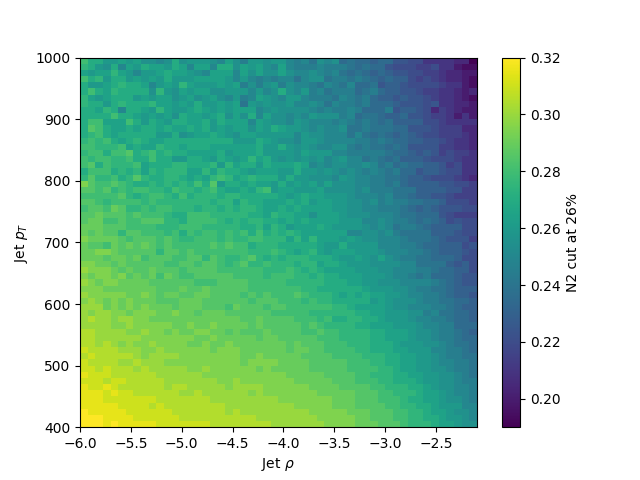

In [21]:
a = np.array([[1, 2, 3, 4, 8],
       [2, 5, 6, 7, 8],
       [5, 7, 11, 12, 13]])

b = np.array([4.5])
res = np.apply_along_axis(lambda norma: norma.searchsorted(0.38), axis = 2, arr = norma)
res[res>100]=0
print(res)
def bineval(a):
    return hist_y_QCD.identifiers("AK8Puppijet0_N2sdb1")[a].lo
bineval(55)
binfunc = np.vectorize(bineval)
hist_y_QCD.identifiers("AK8Puppijet0_N2sdb1")
qmap = binfunc(res)
template.clear()
template._sumw = {():qmap}
template.label = 'N2 cut at 38%'

fig3, ax3, _ = plot.plot2d(template, xaxis="jetrho", patch_opts={})

fig3.savefig("plots/N2DDT_Transformation.pdf")
fig3.savefig("plots/N2DDT_Transformation.png")
fig3.savefig("plots/N2DDT_Transformation.svg")



<b'TH2F' b'Rho2D' 0x7fc8779ab278>


<IPython.core.display.Javascript object>


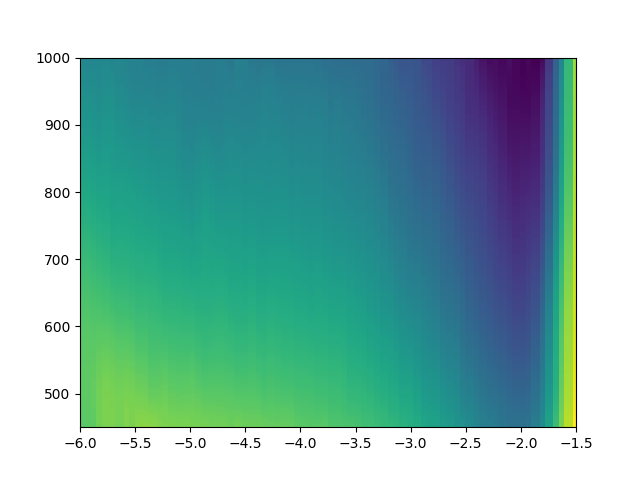

(array([-6.   , -5.975, -5.95 , -5.925, -5.9  , -5.875, -5.85 , -5.825,
        -5.8  , -5.775, -5.75 , -5.725, -5.7  , -5.675, -5.65 , -5.625,
        -5.6  , -5.575, -5.55 , -5.525, -5.5  , -5.475, -5.45 , -5.425,
        -5.4  , -5.375, -5.35 , -5.325, -5.3  , -5.275, -5.25 , -5.225,
        -5.2  , -5.175, -5.15 , -5.125, -5.1  , -5.075, -5.05 , -5.025,
        -5.   , -4.975, -4.95 , -4.925, -4.9  , -4.875, -4.85 , -4.825,
        -4.8  , -4.775, -4.75 , -4.725, -4.7  , -4.675, -4.65 , -4.625,
        -4.6  , -4.575, -4.55 , -4.525, -4.5  , -4.475, -4.45 , -4.425,
        -4.4  , -4.375, -4.35 , -4.325, -4.3  , -4.275, -4.25 , -4.225,
        -4.2  , -4.175, -4.15 , -4.125, -4.1  , -4.075, -4.05 , -4.025,
        -4.   , -3.975, -3.95 , -3.925, -3.9  , -3.875, -3.85 , -3.825,
        -3.8  , -3.775, -3.75 , -3.725, -3.7  , -3.675, -3.65 , -3.625,
        -3.6  , -3.575, -3.55 , -3.525, -3.5  , -3.475, -3.45 , -3.425,
        -3.4  , -3.375, -3.35 , -3.325, -3.3  , -3.275, -3.25 , 

In [22]:
file = uproot.open("~/Research/SangeonPark/coffea/notebooks/correction_files/n2ddt_transform_2017MC.root")
file.keys()
h = file["Rho2D"]
print(h)
fig, ax = plt.subplots()
pc = ax.pcolormesh(h.edges[0], h.edges[1], h.values, cmap='viridis')
ax.add_collection(pc)
fig.savefig("plots/N2DDT_2017.pdf")
fig.savefig("plots/N2DDT_2017.png")
fig.savefig("plots/N2DDT_2017.svg")
h.edges


In [28]:
import scipy
xedges, yedges = h.edges
xcenters, ycenters = np.meshgrid(.5*(xedges[:-1]+xedges[1:]), .5*(yedges[:-1]+yedges[1:]))
pts = np.vstack([xcenters.flatten(), ycenters.flatten()]).T
interp = scipy.interpolate.LinearNDInterpolator(pts, h.values.flatten())
interp(-3, 800)

xcenters_dest, ycenters_dest = np.meshgrid(template.axis('jetrho').centers(), template.axis('AK8Puppijet0_pt').centers())
new_vals = interp(xcenters_dest, ycenters_dest).reshape(template._dense_shape)

ValueError: cannot reshape array of size 3120 into shape (63,55)

In [68]:
with gzip.open("n2quantile_QCD_finern2.pkl.gz", "wb") as fout:
    pickle.dump(hist_y_QCD, fout, protocol=2)  # for python2 compatibility


In [65]:
with gzip.open("n2quantile_HBB.pkl.gz", "wb") as fout:
    pickle.dump(hist_y_HBB, fout, protocol=2)

{(): array([[0.0000000e+00, 1.4956613e-04, 1.9552898e-04, ..., 5.2000000e+01,
        5.2000000e+01, 5.2000000e+01],
       [0.0000000e+00, 0.0000000e+00, 1.0232339e-04, ..., 5.2000000e+01,
        5.2000000e+01, 5.2000000e+01],
       [0.0000000e+00, 5.7318277e-05, 2.8594662e-04, ..., 5.2000000e+01,
        5.2000000e+01, 5.2000000e+01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.2000000e+01,
        5.2000000e+01, 5.2000000e+01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.2000000e+01,
        5.2000000e+01, 5.2000000e+01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)}


<IPython.core.display.Javascript object>


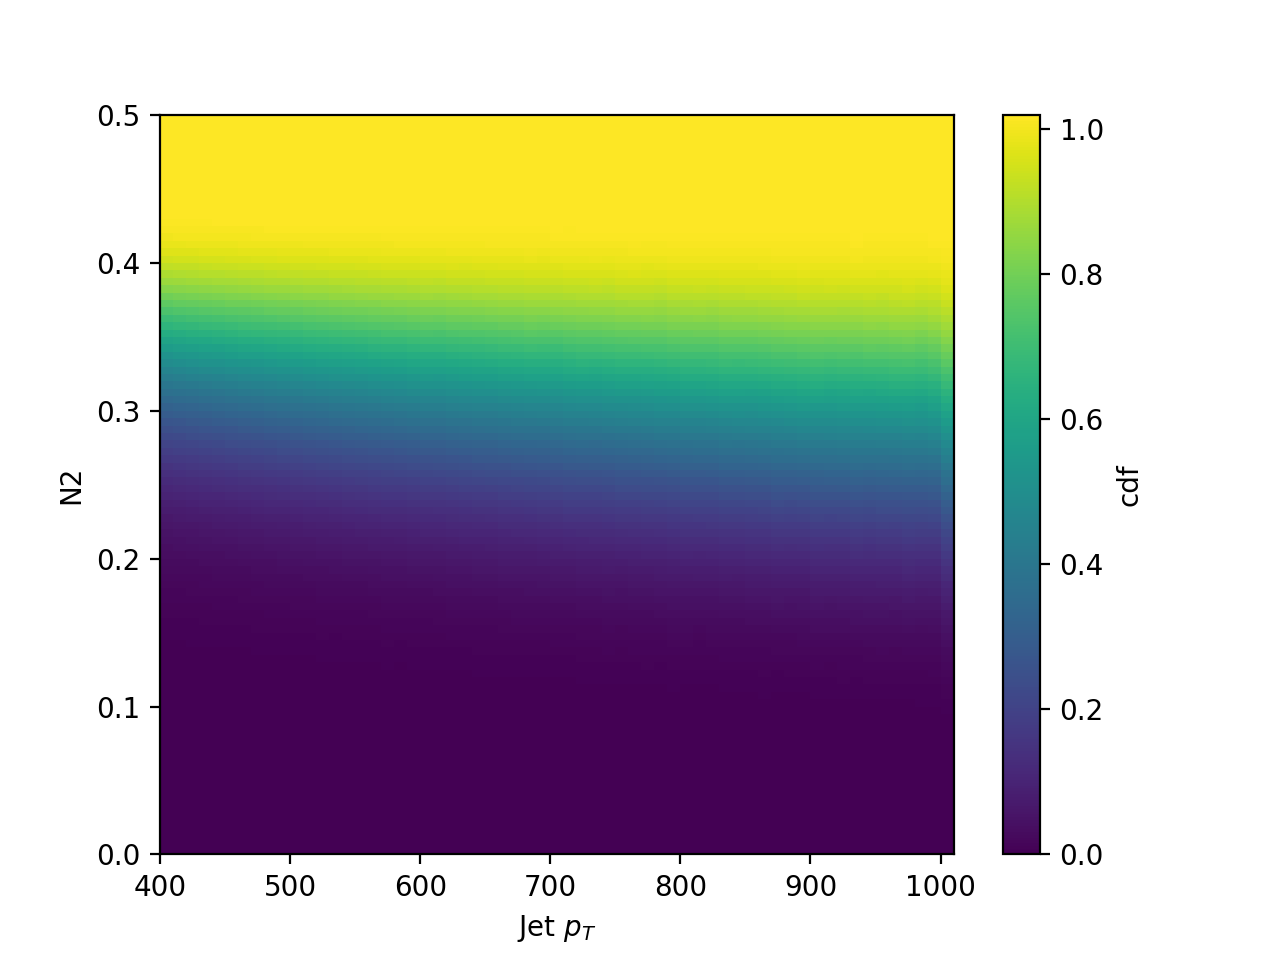

{(): array([[0.0000000e+00, 1.4956613e-04, 1.9552898e-04, ..., 5.2000000e+01,
        5.2000000e+01, 5.2000000e+01],
       [0.0000000e+00, 0.0000000e+00, 1.0232339e-04, ..., 5.2000000e+01,
        5.2000000e+01, 5.2000000e+01],
       [0.0000000e+00, 5.7318277e-05, 2.8594662e-04, ..., 5.2000000e+01,
        5.2000000e+01, 5.2000000e+01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.2000000e+01,
        5.2000000e+01, 5.2000000e+01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.2000000e+01,
        5.2000000e+01, 5.2000000e+01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)}


<IPython.core.display.Javascript object>


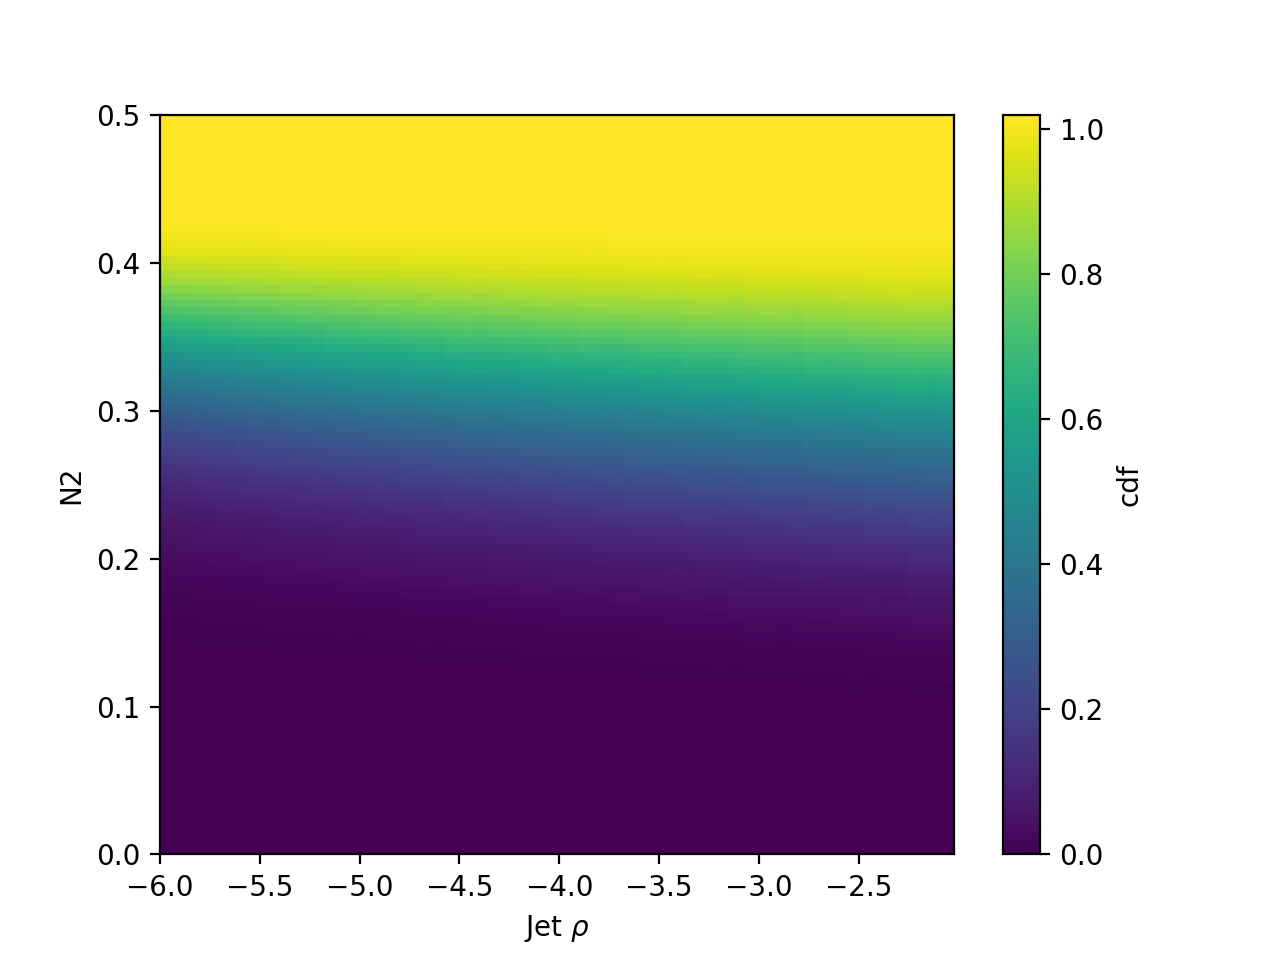

In [88]:
htemp = hist_y_QCD.sum("jetrho")
vals = hist_y_QCD.sum("jetrho").values(overflow='allnan')
valnew = vals[()]/51
print(vals)

htemp.clear()
htemp.label = 'cdf'
#htemp.label = 'Entries'
htemp._sumw = {():valnew}
fig, ax, _ = plot.plot2d(htemp, xaxis="AK8Puppijet0_pt", xoverflow='over', patch_opts={})

fig.savefig("plots/QCD_cdf_integratedrho_finern2.pdf")

htemp2 = hist_y_QCD.project("AK8Puppijet0_pt", slice(450,None), overflow='over')
vals2 = hist_y_QCD.project("AK8Puppijet0_pt", slice(450,None), overflow='over').values(overflow='allnan')
valnew2 = vals2[()]/60
print(vals)

htemp2.clear()
htemp2.label = 'cdf'
#htemp.label = 'Entries'
htemp2._sumw = {():valnew}
fig2, ax2, _ = plot.plot2d(htemp2, xaxis="jetrho", xoverflow='over', patch_opts={})

fig2.savefig("plots/QCD_cdf_integratedpt_finern2.pdf")



<IPython.core.display.Javascript object>


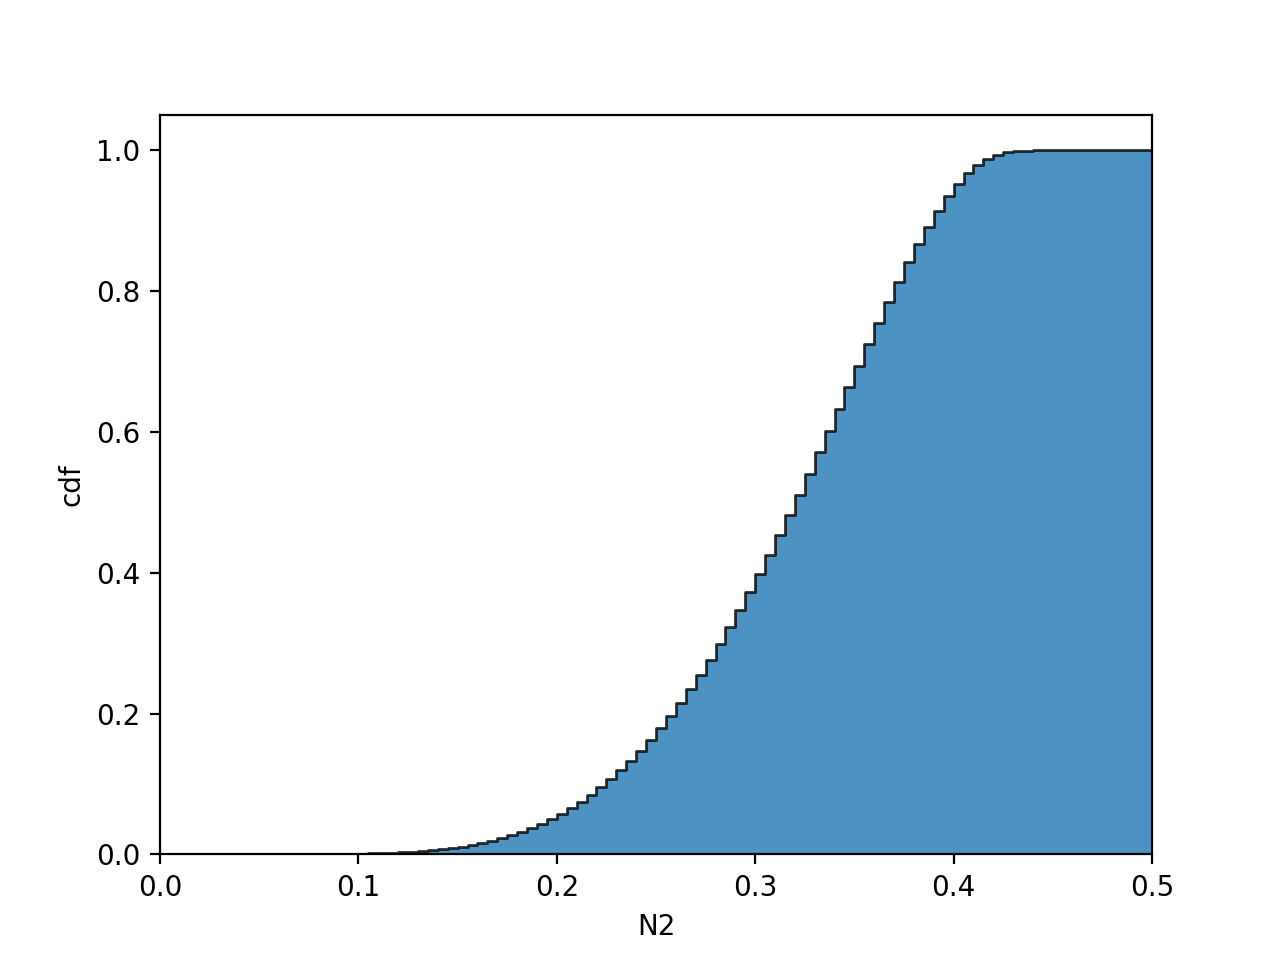

In [75]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}

htemp1d = hist_y_QCD.sum("jetrho").project("AK8Puppijet0_pt", slice(450,None), overflow='over')
vals1d = hist_y_QCD.sum("jetrho").project("AK8Puppijet0_pt", slice(450,None), overflow='over').values(overflow='allnan')
valnew1d = np.cumsum(vals1d[()])
valnew1d = valnew1d/np.amax(valnew1d)

htemp1d.clear()
htemp1d.label = 'cdf'
#htemp.label = 'Entries'
htemp1d._sumw = {():valnew1d}

fig6, ax, _ = plot.plot1d(htemp1d, stack=True, fill_opts=fill_opts)
fig6.savefig("plots/QCD_cdf_1d_finern2_actualint.pdf")



In [ ]:
np.flip(bins,0)

In [ ]:
np.flip(bins,1)

In [ ]:
print(bins)

In [22]:
bins = tuple(ax.edges() for ax in hist_y_HBB.axes())

In [ ]:
print(hist_y_HBB.axes())

In [ ]:
print(hist_y_HBB.axes()[2])

In [48]:
n2q_array = hist_y_QCD.values()[()]
print(hist_y_QCD)

<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7f1962ccb0b8>


In [49]:
n2q_array[0][0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.3858213e-05,
       6.3858213e-05, 6.3858213e-05, 6.3858213e-05, 1.9157464e-04,
       1.9157464e-04, 1.9157464e-04, 2.5543285e-04, 4.1517214e-04,
       5.4288859e-04, 6.7060505e-04, 7.9832150e-04, 8.6217973e-04,
       9.8989613e-04, 1.5000437e-03, 1.5686980e-03, 1.6007209e-03,
       1.7284374e-03, 1.8561537e-03, 1.9520347e-03, 2.4038383e-03,
       2.7233169e-03, 3.3300638e-03, 4.0638088e-03, 4.7710454e-03,
       5.5423276e-03, 6.6281045e-03, 7.1071344e-03, 8.1288666e-03,
       9.7886492e-03, 1.1385292e-02, 1.3523387e-02, 1.5151146e-02,
       1.8022798e-02, 2.0804459e-02, 2.4027955e-02, 2.7125204e-02,
       3.1115904e-02, 3.5340700e-02, 3.9687354e-02, 4.4480834e-02,
       5.0612990e-02, 5.7897121e-02, 6.4061470e-02, 7.2015680e-02,
       8.1882760e-02, 9.1568388e-02, 1.0188112e-01, 1.1468480e-01,
       1.2733661e-01, 1.4218523e-01, 1.5786037e-01, 1.7564337e

In [51]:
bins = tuple(ax.edges() for ax in hist_y_QCD.axes())


In [52]:
print(bins)

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
        670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
        760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
        850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
        940.,  950.,  960.,  970.,  980.,  990., 1000.]), array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]), array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.02

In [53]:
extractor = lookup_tools.extractor()
extractor.add_weight_sets(["* * correction_files/n2ddt_transform_2017MC.root"])
extractor.finalize()
evaluator = extractor.make_evaluator()

In [54]:
evaluator._functions['N2quantile'] = lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)

In [55]:
dl =  lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)

In [56]:
evaluator["N2quantile"](400,-5.99,0.2)

0.018022798

In [57]:
len(dl._axes)


3

In [58]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._axes

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
         490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
         580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
         670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
         760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
         850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
         940.,  950.,  960.,  970.,  980.,  990., 1000.]),
 array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
        -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
        -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
        -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
        -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
        -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
        -2.4  , -2.325, -2.25 , -2.175, -2.1  ]),
 array([0.   , 0.005, 0.01 , 0.01

In [ ]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._dimension

In [ ]:
range(lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._dimension)

In [ ]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._values.shape[0]

In [ ]:
print(n2q_array)

In [ ]:
print(n2q_array)

In [ ]:
np.searchsorted(dl._axes[0], 411, side='right')

In [ ]:
dl._values.shape[0]